In [1]:
using HDF5, FFTW, Statistics
using PyPlot
# pyplot()

In [2]:
arxname="../JLDFiles/Desinhibida/180116s1cut_evento_1.h5"

"../JLDFiles/Desinhibida/180116s1cut_evento_1.h5"

In [3]:
arx=h5open(arxname)

HDF5 data file: ../JLDFiles/Desinhibida/180116s1cut_evento_1.h5

In [4]:
names(arx)

7-element Array{String,1}:
 "CanalesSaturados"
 "Canalesrespuesta"
 "KTT_KInv"        
 "LFPTotal"        
 "Nota"            
 "freq"            
 "kCSDCorrecta"    

Todos los tiempos estan en cuadros, esto es, en 1/freq de segundo. Para las transformadas de Fourier (o graficas bonitas) tenemos que multiplicar los rangos por los factores adecuados.

In [5]:
lfp=read(arx, "LFPTotal")
saturados=read(arx, "CanalesSaturados")
buenos=read(arx, "Canalesrespuesta")
freq=read(arx, "freq")
#late=read(arx, "latencia")
#fin=read(arx,"final")
#retrazo=read(arx,"retrazo")
#println(freq, " ", late, " ", fin , " ", retrazo )

7.022058198545425

In [6]:
nmax=size(lfp)[3]

2001

In [7]:
iniact=retrazo+late # Retrazo + latencia = inicio de señal

UndefVarError: UndefVarError: retrazo not defined

In [8]:
#rango=iniact:fin
rango=1:nmax

1:2001

In [9]:
buenos

863×2 Array{Int64,2}:
 38   5
 44   3
 53  36
 57  23
 56  30
 32  19
 38   6
 45   8
  4  32
 48  34
 54  28
 42  42
 43  38
  ⋮    
 51  30
 53  20
 44  26
 35  10
 28  16
 41  26
 30  14
 29   5
 59  28
 37  18
 44  28
 43  28

In [10]:
ejemplolfp=lfp[44,26,:];

In [11]:
tmax=nmax/freq
rangotiempos=rango./freq
rangofreqs=rango./tmax
rfreqsim=map(x->-freq/2+(x-1)*freq/(nmax-1),rango);
rfreqsim[1001]

0.0

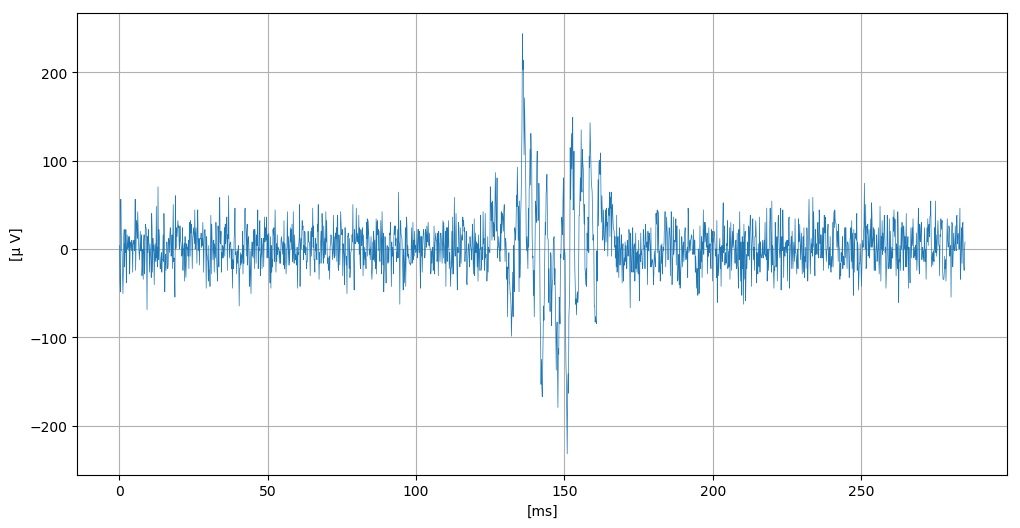

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f27bce92f60>

In [12]:
figura=figure(figsize=(12,6))
grid()
#xlim(120,170)
xlabel("[ms]")
ylabel("[μ V]")
plot(rangotiempos, ejemplolfp, lw=0.5)

In [13]:
plan=plan_fft(ejemplolfp)
fttotal=(plan*ejemplolfp);
ftsym=circshift(fttotal, div(nmax,2));

In [14]:
epoder=map(abs2, ftsym);

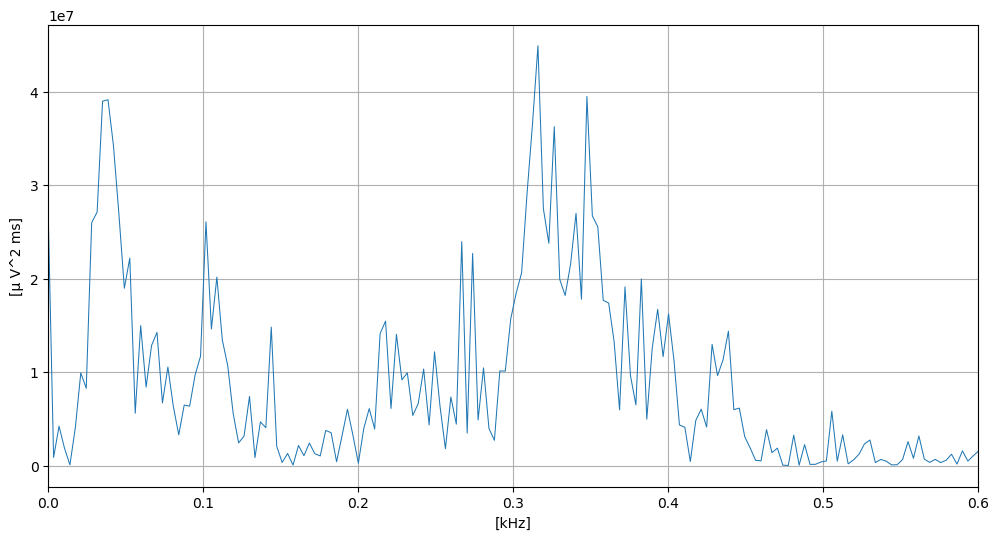

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f27bcb68978>

In [15]:
figura=figure(figsize=(12,6))
grid(which="both")
xlim(-0.0,0.6)
xlabel("[kHz]")
ylabel("[μ V^2 ms]")
#yscale("log")
mediorango=1:500
plot(rfreqsim,epoder, lw=0.74)
#plot(rangofreqs[mediorango],epoder2[mediorango])

In [79]:


function indicecercano(a::Number, freqs::Array)
    #encuentra en índice que tiene el número  más cercano a "a" en el Array freqs
    # si a está más lejos de alguno de ellos que su paso
    tol=abs((max(freqs)-min(freqs))/length(freqs))
    result=findfirst(x->isapprox(a,x, atol=tol), freqs)
    return result
end

function indicecercano(a::Number, freqs::StepRangeLen)
    #encuentra en índice que tiene el número  más cercano a "a" en el Array freqs
    # si a está más lejos de alguno de ellos que su paso
    tol=step(freqs)
    result=findfirst(x->isapprox(a,x, atol=tol), freqs)
    return result
end


indicecercano (generic function with 2 methods)

In [80]:
function filtrobanda(freqs, yys::Array, a::Float64, b::Float64 )
    #filtro pasa banda para DFT anular con rango [0, freqmax)
    if a>b
        b,a=a,b
    end
    abajo=indicecercano(a,freqs)
    arriba=indicecercano(b, freqs)
    result=deepcopy(yys)
    l=length(yys)
    for w in 1:l
        if ! (( abajo < w < arriba ) || (l-arriba)<w<(l-abajo) )
        result[w]=0
        end
    end
    return result
end

filtrobanda (generic function with 2 methods)

In [97]:
rara2=filtrobanda(rangofreqs, fttotal, 0.001,0.05);

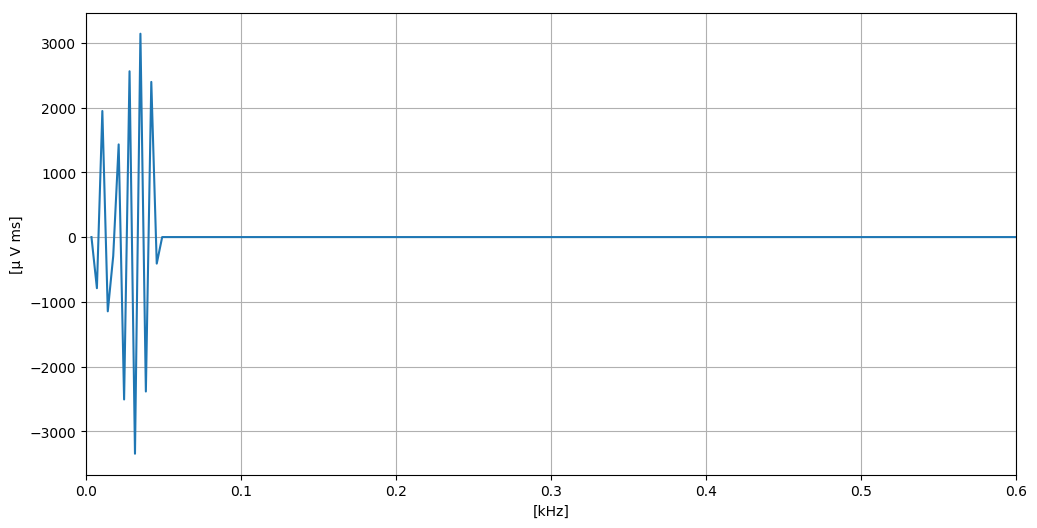

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f27bc82e2b0>

In [98]:

figura=figure(figsize=(12,6))
grid(which="both")
xlim(-0.0,0.6)
xlabel("[kHz]")
ylabel("[μ V ms]")
plot(rangofreqs, real(rara2))

In [86]:
rplan=plan_ifft(rara);

In [99]:
signalfiltrad2=rplan*rara2

2001-element Array{Complex{Float64},1}:
    0.2691971699175684 + 0.5102822886945128im 
   0.10463348999301247 + 0.5038904058690998im 
 -0.061115929096892216 + 0.4973535927507986im 
   -0.2278273794489949 + 0.49069259911448865im
  -0.39527558619575337 + 0.48392724582466906im
   -0.5632340694504322 + 0.477076389739983im  
   -0.7314755079027788 + 0.47015789238831324im
   -0.8997721034322681 + 0.4631885924637309im 
   -1.0678959461048387 + 0.4561842821860857im 
   -1.2356193789192143 + 0.44915968755341373im
   -1.4027153616700332 + 0.4421284525066493im 
   -1.5689578332974206 + 0.4351031270155619im 
   -1.7341220720961419 + 0.4280951590841673im 
                       ⋮                      
    2.0737235859258165 + 0.5670569890335793im 
    1.9397884836458053 + 0.5642974624678491im 
     1.802232150898573 + 0.5610891239675174im 
    1.6612327061434595 + 0.5574598748870347im 
    1.5169738254822835 + 0.5534373704124754im 
     1.369644447941979 + 0.549048946871174im  
    1.21943847200800

In [89]:
maximum(imag(signalfiltrad))

5.122101096936976

In [90]:
maximum(real(signalfiltrad))

61.061220736157466

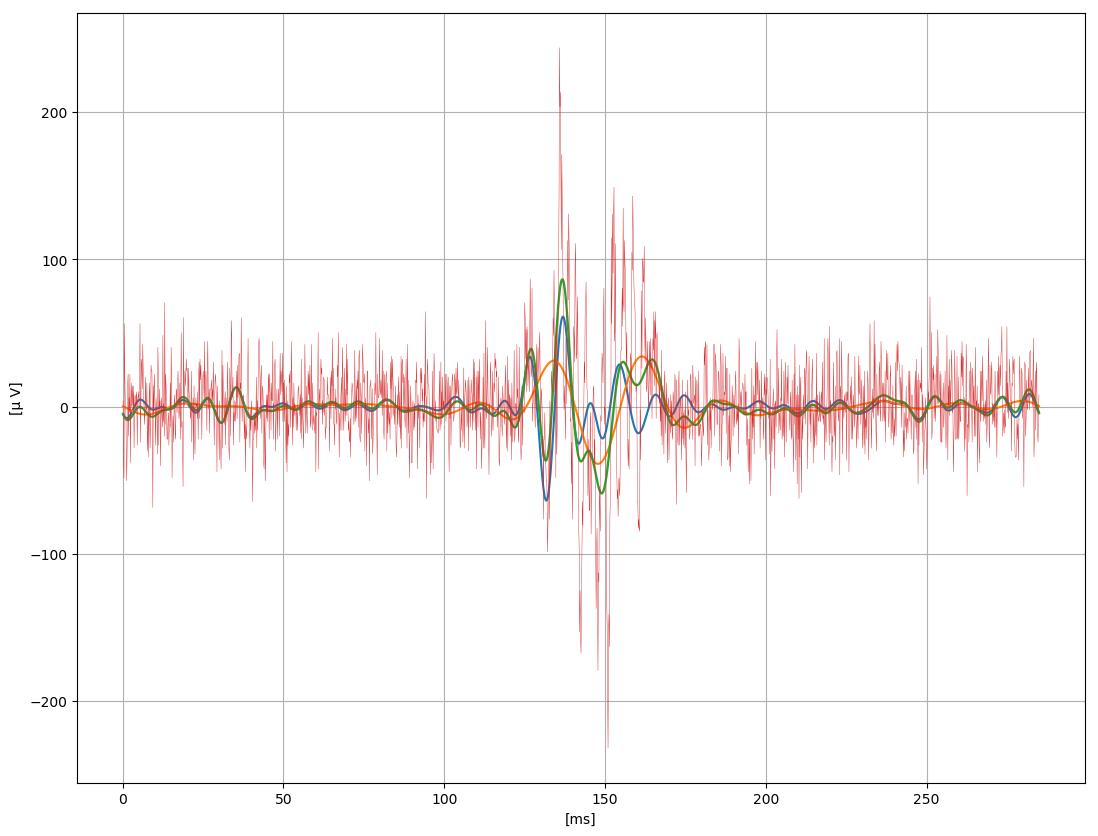

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f27bc59d978>

In [105]:
figura=figure(figsize=(13,10))
grid()
#xlim(120,170)
xlabel("[ms]")
ylabel("[μ V]")
plot(rangotiempos, signalfiltrad, lw=1.5)
plot(rangotiempos, signalfiltrad2, lw=1.5)
plot(rangotiempos, signalfiltrad+signalfiltrad2, lw=1.65)
plot(rangotiempos, ejemplolfp, lw=0.3)


In [78]:
a=0.053022
tol=2*step(rangofreqs)
q(x)=isapprox(a,x, atol=tol)
findfirst(q, rangofreqs)


14

In [75]:
rangofreqs[12:17]

0.0421112935445003:0.003509274462041692:0.05965766585470876

In [76]:
map(q, rangofreqs[12:17])

6-element Array{Bool,1}:
 false
 false
 false
 false
 false
 false

In [77]:
collect(rangofreqs[12:17])

6-element Array{Float64,1}:
 0.0421112935445003  
 0.045620568006541996
 0.049129842468583686
 0.05263911693062538 
 0.05614839139266707 
 0.05965766585470876 

In [69]:
step(rangofreqs)

0.003509274462041692

In [51]:
a=0.005
p=indicecercano(a, rangofreqs)

In [52]:
rangofreqs[2]

0.007018548924083384

In [35]:
rangofreqs[57]

0.20002864433637643

In [34]:
figura=figure(figsize=(12,6))
grid()
xlabel("[kHz]")
ylabel("[μ V^2]")
plot(subfreqs,epoder2)

UndefVarError: UndefVarError: subfreqs not defined